In [7]:
import pycaret
from pycaret.classification import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv(r"T:\my download BAG\ILIdata.csv", index_col=0)  
df.columns=df.columns.str.strip()
df.head()

,Age,Cough,Temprature,Headache,Skin_rash,runny_nose,sorthroat,Hemoptysis,Breathing,Arthritis,Vomiting,Covid_19_result
Sex,,,,,,,,,,,,
Female,35.00,No,No,No,No,No,No,No,No,No,No,Negative
Female,55.00,Yes,Yes,Yes,No,No,No,No,Yes,No,No,Negative
Male,0.75,Yes,No,No,No,No,No,No,Yes,No,No,Positive
Male,30.00,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,Negative
Female,3.00,Yes,No,No,No,No,No,No,No,No,No,Positive


In [10]:
df.describe()

,Age
count,2001.000000
mean,13.255552
std,21.264744
min,0.083333
25%,0.750000
50%,2.000000
75%,16.000000
max,92.000000


In [12]:
df.columns

Index(['Age', 'Cough', 'Temprature', 'Headache', 'Skin_rash', 'runny_nose',
       'sorthroat', 'Hemoptysis', 'Breathing', 'Arthritis', 'Vomiting',
       'Covid_19_result'],
      dtype='object')

<Axes: >

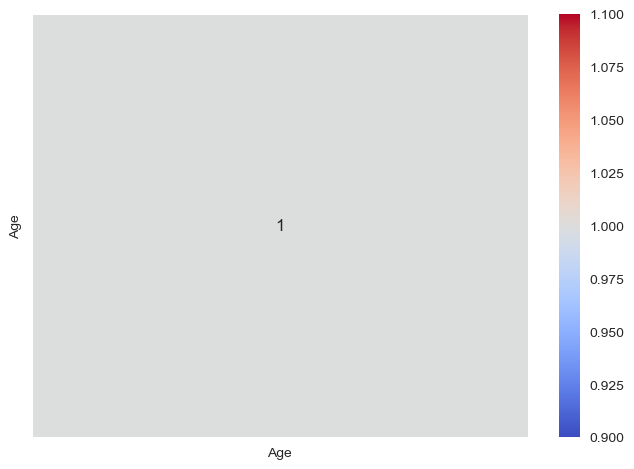

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.4)

# heatmap_correlation matrix 

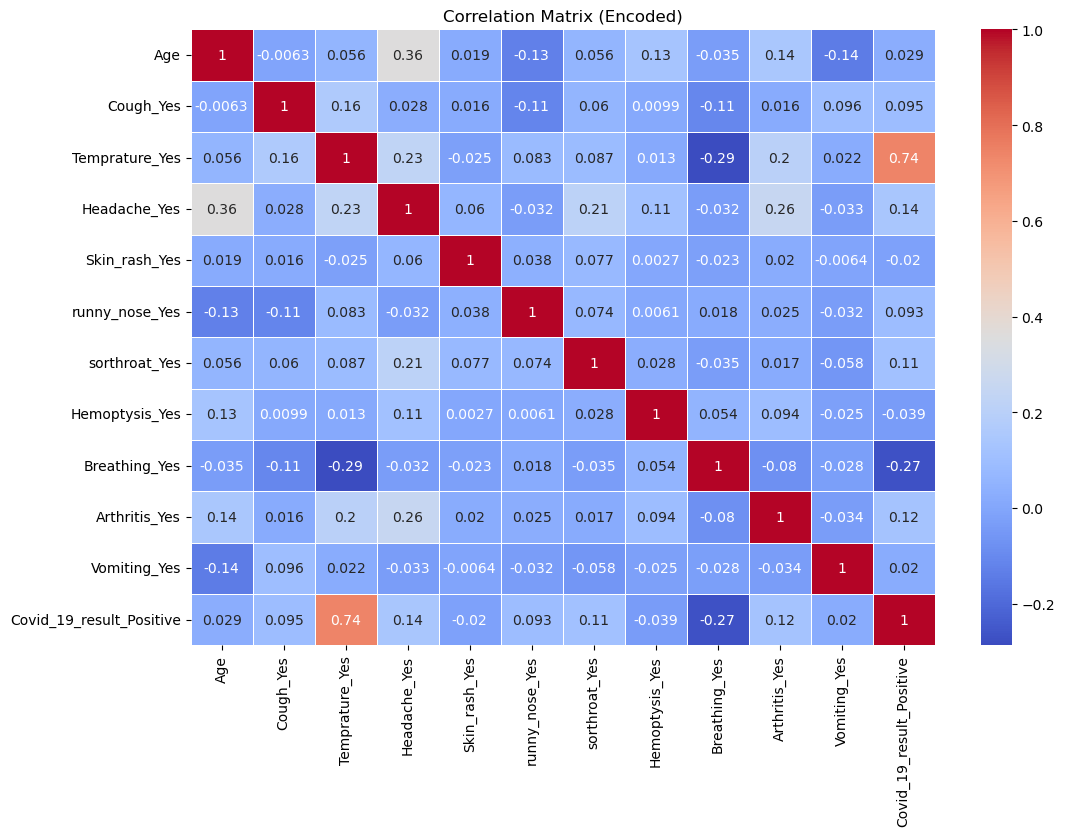

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv(r"T:\my download BAG\ILIdata.csv", index_col=0)  
df.columns = df.columns.str.strip()  # Strip whitespace from column names

# Create dummy variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.4)
plt.title("Correlation Matrix (Encoded)")
plt.show()

In [15]:
# Import necessary libraries
import pandas as pd
from pycaret.classification import *  # Use 'from pycaret.regression import *' for regression tasks

# Load your dataset
df = pd.read_csv(r"T:\my download BAG\ILIdata.csv")  # Update the path to your dataset

# Optional: Display the first few rows of the dataset
print(df.head())

# Set up the PyCaret environment
# Specify the target variable (replace 'target' with your actual target column name)
clf = setup(data=df, target='Covid_19_result', session_id=123)

# Compare different models to find the best one
best_model = compare_models()

# Create a Random Forest model
rf_model = create_model('rf')

# Tune the Random Forest model (optional)
tuned_rf_model = tune_model(rf_model)

# Evaluate the model
evaluate_model(tuned_rf_model)

# Finalize the model
final_model = finalize_model(tuned_rf_model)

# Make predictions on new data (if you have a new dataset)
# new_data = pd.read_csv(r"T:\my download BAG\new_data.csv")  # Load new data if available
# predictions = predict_model(final_model, data=new_data)

# Save the model for future use
save_model(final_model, 'rf_model')

# Optional: Load the model later
loaded_model = load_model('rf_model')

      Sex    Age Cough Temprature Headache Skin_rash runny_nose sorthroat  \
0  Female  35.00    No         No       No        No         No        No   
1  Female  55.00   Yes        Yes      Yes        No         No        No   
2    Male   0.75   Yes         No       No        No         No        No   
3    Male  30.00   Yes        Yes      Yes        No         No        No   
4  Female   3.00   Yes         No       No        No         No        No   

  Hemoptysis Breathing Arthritis Vomiting Covid_19_result  
0         No        No        No       No        Negative  
1         No       Yes        No       No        Negative  
2         No       Yes        No       No        Positive  
3         No       Yes       Yes       No        Negative  
4         No        No        No       No        Positive  


,Description,Value
0,Session id,123
1,Target,Covid_19_result
2,Target type,Binary
3,Target mapping,"Negative: 0, Positive: 1"
4,Original data shape,"(2001, 13)"
5,Transformed data shape,"(2001, 13)"
6,Transformed train set shape,"(1400, 13)"
7,Transformed test set shape,"(601, 13)"
8,Numeric features,1
9,Categorical features,11


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9143,0.9095,0.9143,0.9264,0.9178,0.7305,0.7382,1.0230
ridge,Ridge Classifier,0.9129,0.9116,0.9129,0.9266,0.9168,0.7290,0.7378,0.0930
ada,Ada Boost Classifier,0.9129,0.8983,0.9129,0.9191,0.9148,0.7137,0.7174,0.1850
lda,Linear Discriminant Analysis,0.9121,0.9116,0.9121,0.9262,0.9162,0.7273,0.7363,0.0930
qda,Quadratic Discriminant Analysis,0.9093,0.8808,0.9093,0.9224,0.9131,0.7162,0.7242,0.1060
nb,Naive Bayes,0.9050,0.8823,0.9050,0.9200,0.9094,0.7057,0.7148,0.0990
gbc,Gradient Boosting Classifier,0.9036,0.9066,0.9036,0.9081,0.9048,0.6767,0.6800,0.1890
lightgbm,Light Gradient Boosting Machine,0.9029,0.9081,0.9029,0.9046,0.9026,0.6649,0.6681,0.2170
rf,Random Forest Classifier,0.8886,0.8980,0.8886,0.8906,0.8881,0.6144,0.6188,0.2380
knn,K Neighbors Classifier,0.8871,0.8541,0.8871,0.8827,0.8785,0.5586,0.5765,0.1160


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8429,0.8739,0.8429,0.8659,0.8513,0.5114,0.5197
1,0.9000,0.9064,0.9000,0.8950,0.8963,0.6231,0.6267
2,0.8857,0.8315,0.8857,0.8944,0.8891,0.6226,0.6254
3,0.8643,0.9077,0.8643,0.8554,0.8582,0.4981,0.5025
4,0.9000,0.9103,0.9000,0.8954,0.8965,0.6364,0.6398
5,0.9143,0.8725,0.9143,0.9122,0.9076,0.6660,0.6832
6,0.8857,0.9278,0.8857,0.8857,0.8857,0.6104,0.6104
7,0.9286,0.9047,0.9286,0.9286,0.9286,0.7565,0.7565
8,0.9000,0.9473,0.9000,0.8973,0.8983,0.6481,0.6489


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8786,0.8675,0.8786,0.9078,0.8869,0.6383,0.6565
1,0.9286,0.9079,0.9286,0.9349,0.9307,0.7642,0.7676
2,0.8714,0.7642,0.8714,0.8862,0.8769,0.5882,0.5939
3,0.9286,0.9056,0.9286,0.9347,0.9306,0.7709,0.7741
4,0.9286,0.9423,0.9286,0.9388,0.9314,0.7774,0.7845
5,0.9286,0.8713,0.9286,0.9312,0.9296,0.7639,0.7648
6,0.9071,0.9226,0.9071,0.9326,0.9132,0.7300,0.7498
7,0.9000,0.9050,0.9000,0.9174,0.9051,0.6971,0.7077
8,0.9357,0.9532,0.9357,0.9478,0.9387,0.8025,0.8121


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['Age'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean')...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                    

In [2]:
Feature=['Sex_n', 'Cough_n', 'Temprature_n', 'Headache_n', 'Skin_rash_n',
       'runny_nose_n', 'sorthroat_n', 'Hemoptysis_n', 'Breathing_n',
       'Arthritis_n', 'Vomiting_n']

In [3]:
# Get the feature importances
importances = rf_model.feature_importances_

# Assuming rf.feature_names is your list of feature names
features = Feature
# Create a DataFrame with features and their corresponding importances
importance_df = pd.DataFrame(zip(features, importances), columns=['Features', 'Importances'])

# Display the DataFrame
print(importance_df)

        Features  Importances
0          Sex_n     0.030318
1        Cough_n     0.300937
2   Temprature_n     0.006029
3     Headache_n     0.493068
4    Skin_rash_n     0.019222
5   runny_nose_n     0.005397
6    sorthroat_n     0.035666
7   Hemoptysis_n     0.020581
8    Breathing_n     0.008280
9    Arthritis_n     0.051536
10    Vomiting_n     0.011312


<Axes: >

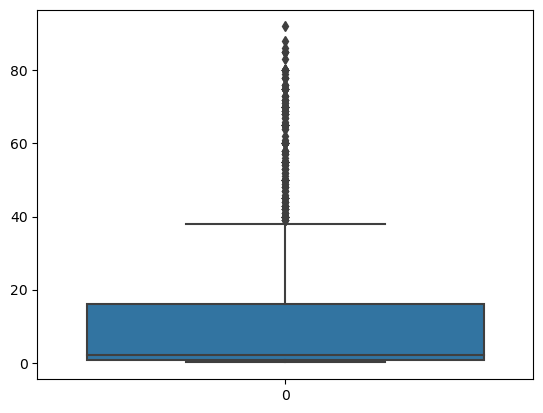

In [2]:
sns.boxplot(df['Age'])